    ### DMML WS24: Übung1 am 05.11.24: Schätzung von Fischgewichten
#### Gruppe IV: Anna, Raphael und Sander-Jelle

### I. Angabe
Die Datei "fish.csv" zum sogenannten Fischmarkt-Datensatz kann über den Link 
https://www.kaggle.com/datasets/vipullrathod/fish-market 
bezogen werden. 
Diese Datei wurde im Verhältnis 80:20 in die Dateien „fish_train.csv“ und „fish_test.csv“ aufgeteilt. 
Der Datensatz enthält Messdaten von sieben verschiedenen Fischarten, die auf Fischmärkten verkauft werden. Die 

Bedeutungen der einzelnen Spalten sind (Grafiken siehe "DMML-WS24-Uebung1-20241105-fish-V02"): 

    Species
    Weight 
    species name of fish 
    weight of fish in Gram g (ohne Flossen und Kiemen) 
    Length1 
    vertical length in cm 
    diagonal length in cm 
    Length2 
    Length3 
    cross length in cm 
    height in cm 
    Height 
    Width 
    diagonal width in cm 

Es ist nicht klar, was die gemessenen Längen wirklich aussagen. 
Für die Aufgabenstellung ist das aber nicht entscheidend. 
Das Ziel besteht darin, mittels linearer Regression eine möglichst gute Schätzformel für das Gewicht von Fischen, 
zunächst unabhängig von der Spezies und später auch unter Verwendung der Spezies, zu schätzen. 

### II. Aufgabenstellung

Allgemeine Aufgabenstellung und Namenskonventionen siehe DMML-WS24-Uebung1-20241105-fish-V02"

Spezifische Aufgabenstellungen:

TEIL 1 (Exploratory data analysis [EDA/Visualization]) 
1) Importiert die Dateiinhalte von fish.csv, fish-train.csv sowie fish-test.csv in die Dataframes df, df_train bzw. 
df_test. 
2) Schaut euch die Daten an. 
Erzeugt eine paar statistische Kennzahlen, und ein paar Visualisierungen, die interessant sein könnten. 
3) Beantworte die folgenden Fragen: - Welche Skalenniveaus liegen bei den einzelnen Variablen vor? - Gibt es fehlende Werte, Ausreißer oder unplausible Daten bei Betrachtung der einzelnen Variablen? - Warum untersucht man diese Dinge, und was kann man tun? 

TEIL 5 (Forward and Backward Selection) 
 
1) Führt eine „Forward Feature Selection“ auf den Trainingsdaten basierend auf ‚r2‘ mit dem folgenden Code 
durch: 
 "from sklearn.feature_selection import SequentialFeatureSelector 
lr = LinearRegression() 
for features in range(1,X_train.shape[1]): 
sfs = SequentialFeatureSelector(lr, n_features_to_select=features, cv=5, scoring='r2', 
direction='forward') 
sfs.fit(X_train,y_train) 
print(sfs.get_feature_names_out())" 
 Erklärt, was der Code macht. 
Wie ist die Ausgabe zu verstehen? 

2) Führt entsprechend eine „Backward Feature Selection“ durch. 
Was bedeutet hier die Ausgabe? 

3) Wie viele verschiedene lineare Modelle lassen sich im Allgemeinen bei 5 Features bilden? 
Wie viele verschiedene Modelle werden davon bei einer Forward bzw. Backward Selection vorgeschlagen? 
4) Betrachtet die Modelle der Backward Selection. Vergleicht die Werte der Gütemaße Adj. R2, AIC und BIC-Werte dieser Modelle. 
(Tipp: mit dir(model) seht ihr, wie ihr diese Werte abfragen könnt). 
Welches Modell sollte ausgewählt werden? 

5) Berechne zusätzlich R2 und RMSE der Testdaten für alle Modelle, die von der Backward Selection vorgeschlagen 
wurden. 

### Teil 1 (Exploratory data analysis [EDA/Visualization]) 

#### 1.1 Datenimport

In [1]:
# Import dstools (absolute path required, please change to your systems settings)
import importlib
import sys

path = '/dstools-master/dstools/__init__.py'
name = 'dstools'

spec = importlib.util.spec_from_file_location(name, path)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module
spec.loader.exec_module(module)

In [2]:
# Libraries 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from dstools.tools import quality

import matplotlib.pyplot as plt

In [3]:
# loading data 
df = pd.read_csv("fish.csv")
df_train = pd.read_csv("fish_train.csv")
df_test = pd.read_csv("fish_test.csv")

In [4]:
# printing five samples for df
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
32,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
88,Perch,130.0,20.0,22.0,23.5,6.1100,3.5250
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
91,Perch,130.0,20.5,22.5,24.0,5.8560,3.6240


#### 1.2 Datenanalyse

In [5]:
# analysing data qualilty
quality(df)

Dataframe has 159 rows and 7 columns.

0 column(s) with missing values.

4 column(s) with outliers.



,type,unique,missing_abs,missing_rel,outliers_abs,outliers_rel
Species,object,7,0,0.0,0,0.00
Weight,float64,101,0,0.0,3,1.89
Length1,float64,116,0,0.0,3,1.89
Length2,float64,93,0,0.0,3,1.89
Length3,float64,124,0,0.0,1,0.63
Height,float64,154,0,0.0,0,0.00
Width,float64,152,0,0.0,0,0.00


In [6]:
# analysing of statistical key figures for quantitative characteristics
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


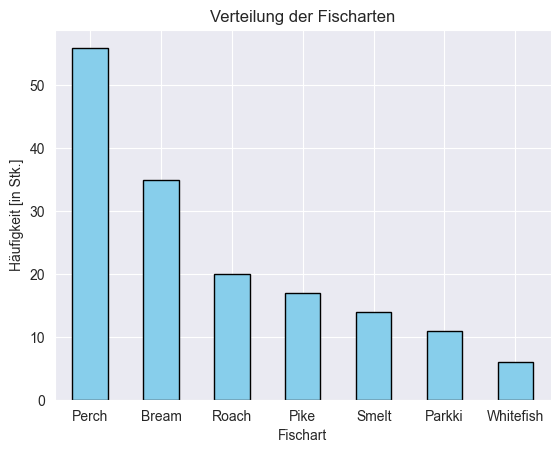

In [7]:
# visualsing data 

# Distribution of fish species
data = df['Species'].value_counts()

data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Verteilung der Fischarten')
plt.xlabel('Fischart')
plt.ylabel('Häufigkeit [in Stk.]')
plt.xticks(rotation=0)
plt.show()

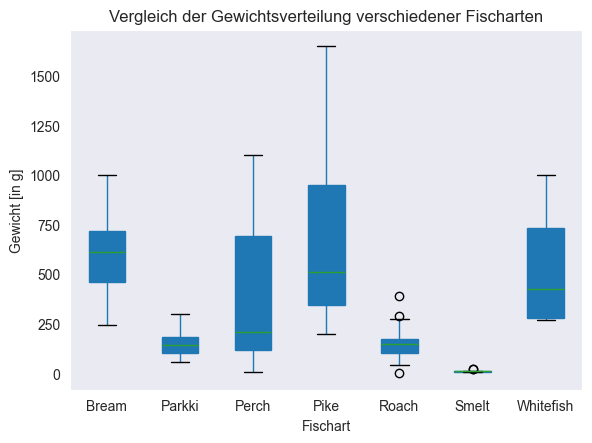

In [8]:
# Comparison of weight distribution across fish species
df.boxplot(column='Weight', by='Species', grid=False, patch_artist=True)
plt.title('Vergleich der Gewichtsverteilung verschiedener Fischarten')
plt.suptitle('')
plt.xlabel('Fischart')
plt.ylabel('Gewicht [in g]')
plt.xticks(rotation=0)
plt.show()

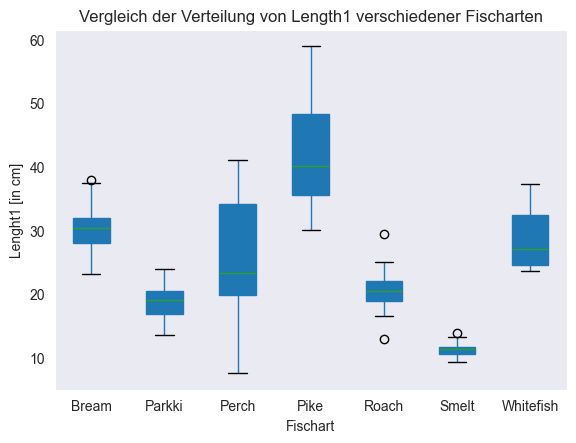

In [9]:
# Comparison of lenght1 distribution across fish species
df.boxplot(column='Length1', by='Species', grid=False, patch_artist=True)
plt.title('Vergleich der Verteilung von Length1 verschiedener Fischarten')
plt.suptitle('')
plt.xlabel('Fischart')
plt.ylabel('Lenght1 [in cm]')
plt.xticks(rotation=0)
plt.show()

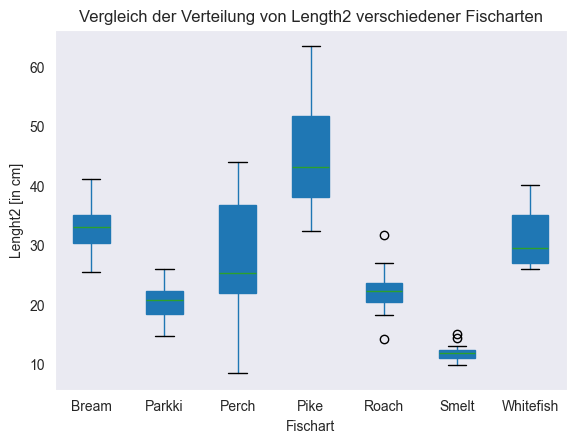

In [10]:
# Comparison of lenght2 distribution across fish species
df.boxplot(column='Length2', by='Species', grid=False, patch_artist=True)
plt.title('Vergleich der Verteilung von Length2 verschiedener Fischarten')
plt.suptitle('')
plt.xlabel('Fischart')
plt.ylabel('Lenght2 [in cm]')
plt.xticks(rotation=0)
plt.show()

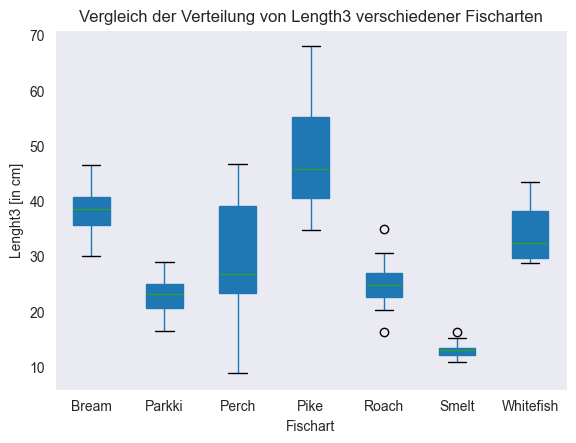

In [11]:
# Comparison of lenght3 distribution across fish species
df.boxplot(column='Length3', by='Species', grid=False, patch_artist=True)
plt.title('Vergleich der Verteilung von Length3 verschiedener Fischarten')
plt.suptitle('')
plt.xlabel('Fischart')
plt.ylabel('Lenght3 [in cm]')
plt.xticks(rotation=0)
plt.show()

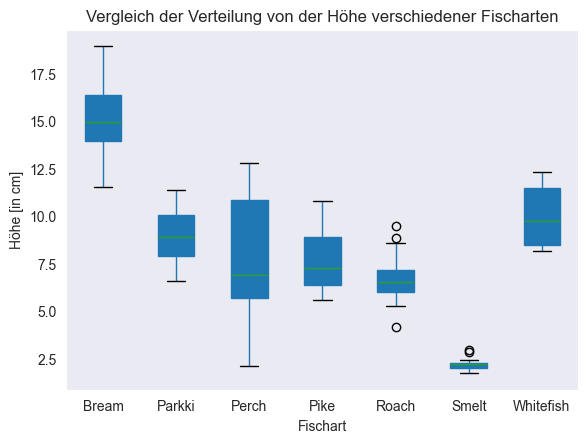

In [12]:
# Comparison of height distribution across fish species
df.boxplot(column='Height', by='Species', grid=False, patch_artist=True)
plt.title('Vergleich der Verteilung von der Höhe verschiedener Fischarten')
plt.suptitle('')
plt.xlabel('Fischart')
plt.ylabel('Höhe [in cm]')
plt.xticks(rotation=0)
plt.show()

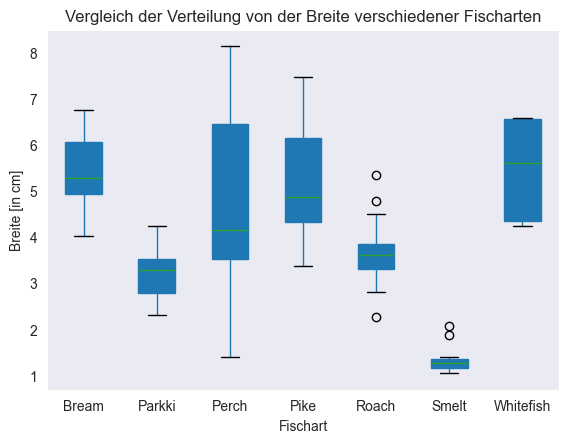

In [13]:
# Comparison of width distribution across fish species
df.boxplot(column='Width', by='Species', grid=False, patch_artist=True)
plt.title('Vergleich der Verteilung von der Breite verschiedener Fischarten')
plt.suptitle('')
plt.xlabel('Fischart')
plt.ylabel('Breite [in cm]')
plt.xticks(rotation=0)
plt.show()

#### 1.3 Fragen




1) Welche Skalenniveaus liegen bei den einzelnen Variablen vor? 
Bei der Variabel "Species" liegt eine Nominalskala vor, das bedeutet, dass die Merkmale keine Reihenfolge besitzen und nur das Zählen oder Vergleichen der Häufigkeit möglich ist. Bei allen anderen Merkmalen liegt eine Verhältnisskala vor, das bedeutet, dass alle mathematischen Operationen bei diesen Varaiblen möglich sind, einschließlich das Bilden von Verhältnissen

2) Gibt es fehlende Werte, Ausreißer oder unplausible Daten bei Betrachtung der einzelnen Variablen? Die Auswertung hat ergeben, dass keine fehlenden Einträge in der Datei "fish.csv" vorliegen. Einige Merkmalsausprägungen wurden alls Ausreißer erfasst, diese sind in den Boxplots zu erkennen (Achtung in den Boxplots erfolgt die Berechnung nach Fischart!). Ob die Ausreißer realisitsch sind, oder hier Fehler passiert, müsste mit einem Person aus der Domäne abgeklärt werden (ev. Falsche Klassifizierung, Messfehler, ...). Ich würde noch abklären ob die Schwankungen bei "Perch" und "Pike" realisitsch sind, ev. gibt es hier Unterarten des Fisches mit stärker abweichenden Parametern. 

3) Warum untersucht man diese Dinge, und was kann man tun? Fehlende Werte und Ausreißer können die Analysen verzerren und zu falschen Schlussfolgerungen führen. Die Kenntnis über das Skalenniveaus gibt vor, welche mathematischen Operationen man sinnvoll durchführen kann. 
Ausreißer können auf Fehler oder Anomalien hinweisen, die weitere Untersuchungen erfordern.